 # Gaussian Mixture Model (GMM)



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data_set = pd.read_csv('players.csv')
data_set.head()

,player;age;height;nationality;position;value;games;minutes;goals;assists;crosses;tackles;pressures;blocks;touches;fouls;fouled;offsides;own goals;ball recoveries;saves;squad;Season;league;Attendance;games starts;passes completed;sca;gca;dribbles completed;pens won;goals against gk;shots on target against;CLBestScorer;cards yellow;shots total;LgRk;MP;W;D;L;GF;GA;Pts;CL;WinCL
0,Zouhair Feddal;30;192;Morocco;Defender;4000000...
1,Zlatan Ibrahimović;37;195;Sweden;Forward;35000...
2,Zinedine Ferhat;26;180;Algeria;Forward;2000000...
3,Zinédine Ould Khaled;19;195;France;Midfield;15...
4,Zeki Celik;22;180;Turkey;Defender;20000000;23;...


In [6]:
import pandas as pd

# Read the dataset from CSV file with semicolon delimiter
data_set = pd.read_csv('players.csv', delimiter=';')

# Drop the specified columns
columns_to_drop = ['fouled','own goals','ball recoveries','saves','squad','Season','league','Attendance','games starts', 'passes completed', 'sca', 'gca', 'dribbles completed', 'pens won', 'goals against gk', 'shots on target against', 'CLBestScorer', 'cards yellow', 'shots total', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'CL', 'WinCL']
data_set.drop(columns_to_drop, axis=1, inplace=True)
data_set

,player,age,height,nationality,position,value,games,minutes,goals,assists,crosses,tackles,pressures,blocks,touches,fouls,offsides
0,Zouhair Feddal,30,192.0,Morocco,Defender,4000000,17,1431,1,2,1,17,124,19,1236,23,0
1,Zlatan Ibrahimović,37,195.0,Sweden,Forward,3500000,18,1362,10,5,23,4,126,9,813,30,20
2,Zinedine Ferhat,26,180.0,Algeria,Forward,2000000,26,2246,3,4,85,27,263,24,1264,17,7
3,Zinédine Ould Khaled,19,195.0,France,Midfield,15000,1,59,0,0,0,1,24,3,38,2,0
4,Zeki Celik,22,180.0,Turkey,Defender,20000000,23,2070,0,2,47,65,391,37,1613,38,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,Victor Osimhen,18,186.0,Niger,Forward,1000000,12,287,0,0,4,2,79,1,150,9,2
6820,Renato Steffen,25,170.0,Switzerland,Forward,3500000,16,659,0,0,11,10,151,8,286,20,0
6821,Paul Jaeckel,19,189.0,Germany,Defender,5000,3,270,0,0,4,4,30,4,172,3,0
6822,Paul Verhaegh,33,178.0,Netherlands,Defender,1000000,31,2614,2,2,43,30,291,58,1915,20,0


In [8]:
# Assuming you have already created the DataFrame `df`
df = pd.DataFrame(data_set[['player', 'games', 'goals']])
df

,player,games,goals
0,Zouhair Feddal,17,1
1,Zlatan Ibrahimović,18,10
2,Zinedine Ferhat,26,3
3,Zinédine Ould Khaled,1,0
4,Zeki Celik,23,0
...,...,...,...
6819,Victor Osimhen,12,0
6820,Renato Steffen,16,0
6821,Paul Jaeckel,3,0
6822,Paul Verhaegh,31,2


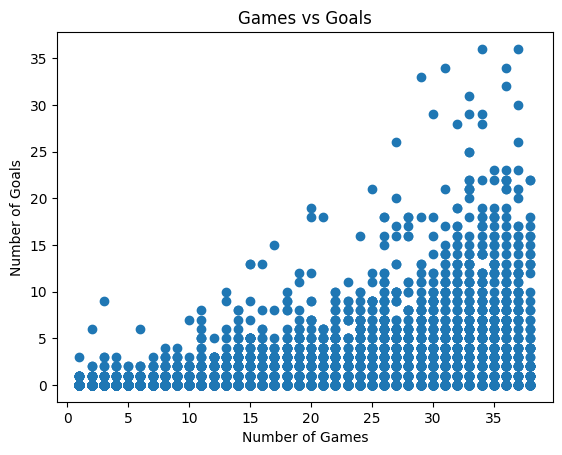

In [9]:
# Assuming you have already created the DataFrame `df`
df = pd.DataFrame(data_set[['player', 'games', 'goals']])

# Extract the 'games' and 'goals' columns from the DataFrame
games = df['games']
goals = df['goals']

# Create the plot
plt.scatter(games, goals)
plt.xlabel('Number of Games')
plt.ylabel('Number of Goals')
plt.title('Games vs Goals')
plt.show()

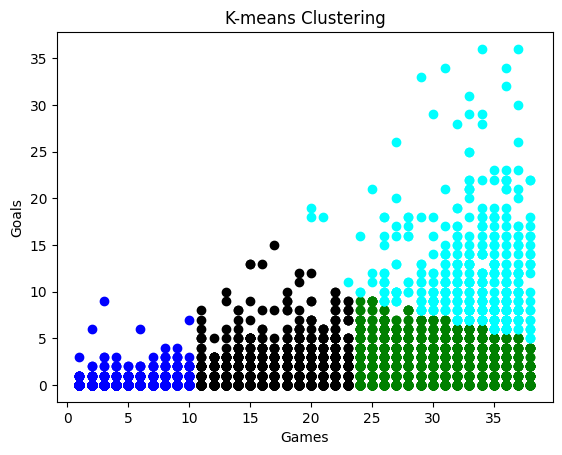

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have already created the DataFrame `df`
df = pd.DataFrame(data_set[['player', 'games', 'goals']])

# Training the k-means model
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['games', 'goals']])  # Only using 'games' and 'goals' columns for clustering

# Predicting the clusters
pred = kmeans.predict(df[['games', 'goals']])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.columns = ['player', 'games', 'goals', 'cluster']

# Plotting the results
color = ['blue', 'green', 'cyan', 'black']
for k in range(0, 4):
    df_cluster = frame[frame["cluster"] == k]
    plt.scatter(df_cluster["games"], df_cluster["goals"], c=color[k])

plt.xlabel('Games')
plt.ylabel('Goals')
plt.title('K-means Clustering')
plt.show()

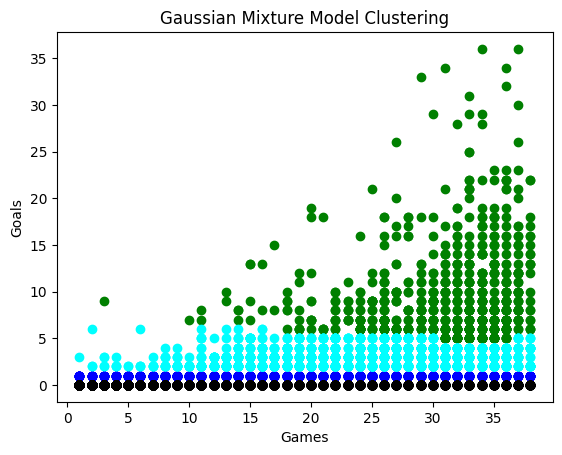

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming you have already created the DataFrame `df`
df = pd.DataFrame(data_set[['player', 'games', 'goals']])

# Training the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm.fit(df[['games', 'goals']])  # Only using 'games' and 'goals' columns for clustering

# Predicting the cluster labels
labels = gmm.predict(df[['games', 'goals']])
frame = pd.DataFrame(df)
frame['cluster'] = labels
frame.columns = ['player', 'games', 'goals', 'cluster']

# Plotting the results
color = ['blue', 'green', 'cyan', 'black']
for k in range(0, 4):
    data_cluster = frame[frame["cluster"] == k]
    plt.scatter(data_cluster["games"], data_cluster["goals"], c=color[k])

plt.xlabel('Games')
plt.ylabel('Goals')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

# another example

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets._samples_generator import make_blobs
import matplotlib.pyplot as plt
from numpy import random 
from pandas import DataFrame 

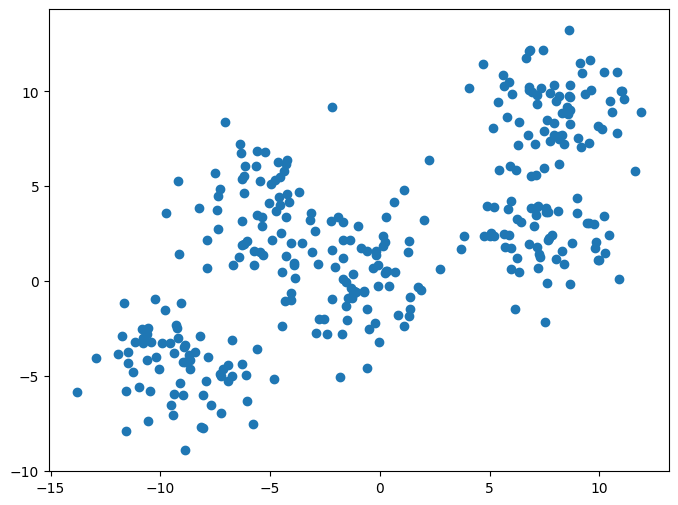

In [3]:

random.seed(234)
x, _ = make_blobs(n_samples=330, centers=5, cluster_std=1.84)
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1])
plt.show() 

Clustering with Gaussian Mixture

   Next, we'll define the Gaussian Mixture model and fit on x data. Here, we'll divide data into 5 clusters, so we set target cluster number in n_components parameter.  You can also change other default parameters based on your data and clustering approach

In [6]:
gm = GaussianMixture(n_components=5).fit(x)
 
gm.get_params() 


{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 5,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

After fitting the model we can obtain centers of each cluster. 

In [7]:

centers = gm.means_
print(centers)


[[ 7.28418475  2.56387124]
 [-9.18288987 -4.47852917]
 [-5.55836831  3.87299888]
 [ 8.11454324  9.24741885]
 [-0.90246061  0.16230294]]


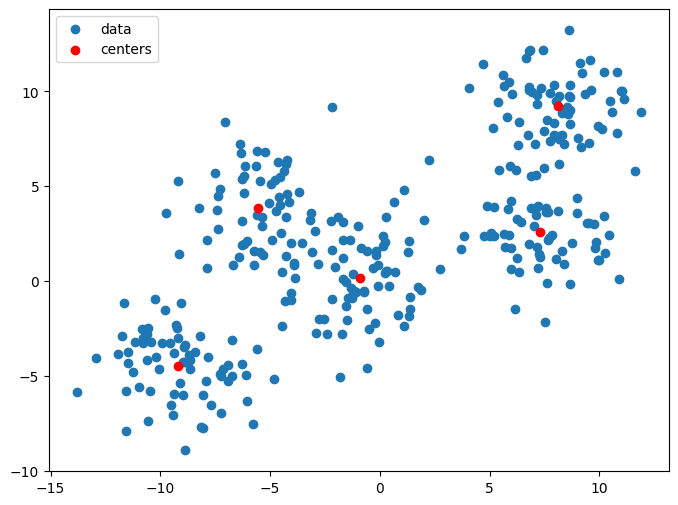

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show() 

We predict x data with trained model to identify each elements target center. Below code shows how to group elements and visualize the clusters with color in a plot.

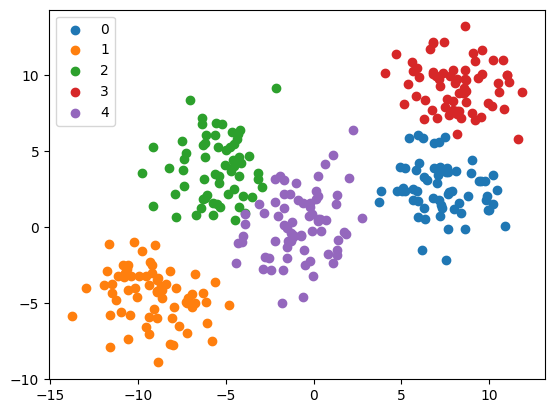

In [9]:
pred = gm.predict(x)

df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show() 
 

Graph shows all the clusters and their belonging elements. 
In below example, we change the clusters number and observe divided clusters in a plot.

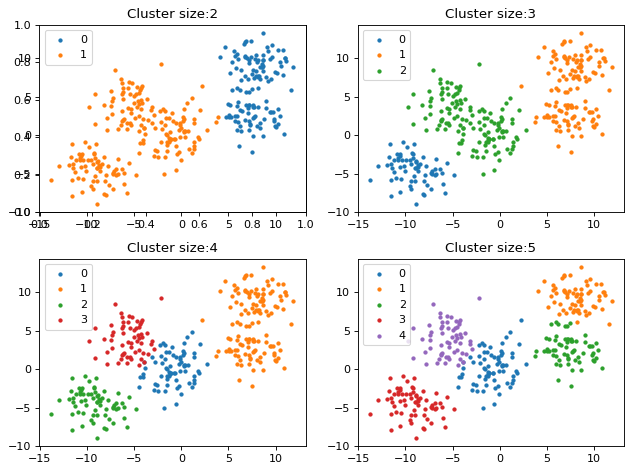

In [10]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
 gm = GaussianMixture(n_components=i).fit(x)
 pred = gm.predict(x)
 df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
 groups = df.groupby('label')
 f.add_subplot(2, 2, i-1)
 for name, group in groups:
    plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("Cluster size:" + str(i))
    plt.legend()

plt.tight_layout()        
plt.show()